<a href="https://colab.research.google.com/github/arcparagon/Jobsheet_PVCK2021/blob/main/Week3JobsheetPCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

 Mengubah tingkat kecerahan citra
 --------------------------------
Input the brightness value : 5


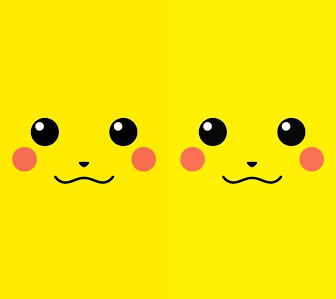

In [4]:
print(' Mengubah tingkat kecerahan citra')
print(' --------------------------------')
try:
  brightness = int(input('Input the brightness value : '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK2021/Week2/download.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range (original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

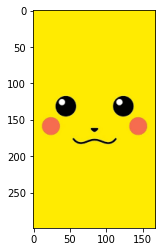

In [5]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PVCK2021/Week2/download.png')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

-------------------------
(1.0 to 3.0 with comma here) [1.0-3.0]: 3.0
0 to 255 comma restricted [0-255]: 50


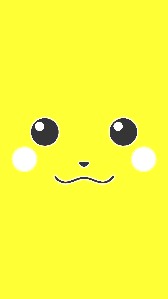

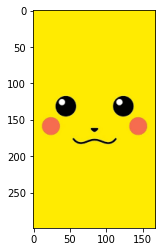

In [6]:
new_image = np.zeros(image.shape, image.dtype)

# Initialize values
print('-------------------------')
try:
    alpha = float(input('(1.0 to 3.0 with comma here) [1.0-3.0]: '))
    beta = int(input('0 to 255 comma restricted [0-255]: '))
except ValueError:
    print('Just Input it!')

# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Input Brightness Here : 10


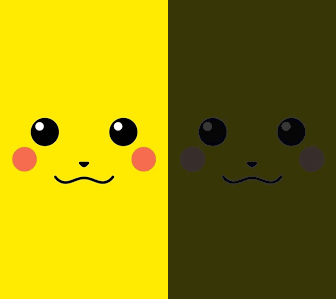

In [7]:
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
  brightness = int(input('Input Brightness Here : '))
except ValueError:
  print('Not Number. Try Again')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

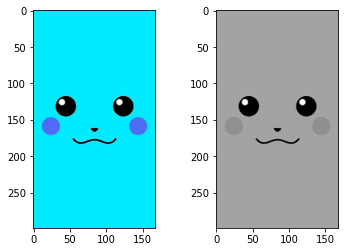

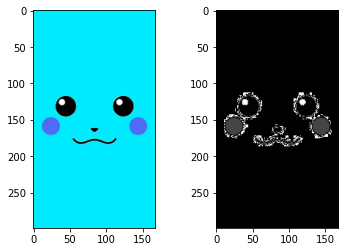

In [8]:
#Number 3
# a. Averaging

img1 = image
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

gray_img = np.mean(img2, axis=2)

#   for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#   img4[y,x] = np.mean(img2[y,x])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')

# b. Lightness

R, G, B = img2[:,:,0], img2[:,:,1], img2[:,:,2]
max_channels = np.maximum(np.minimum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')